<a href="https://colab.research.google.com/github/43pratik/DL_Lab/blob/main/DL_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Generate a sample dataset
data = pd.DataFrame({
    'x': np.random.rand(100) * 10,
    'y': np.random.rand(100) * 5 + np.random.rand(100) * 2,
    'z': np.random.rand(100) * 3
})

print("Generated Sample Data:\n", data.head())

Generated Sample Data:
           x         y         z
0  4.995288  3.033702  0.092881
1  5.627116  3.985441  2.850791
2  9.233627  2.197324  0.834779
3  4.562839  1.719089  2.461667
4  6.840532  3.293338  1.284129


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from CSV - Using generated data instead
print("Original Data:\n", data.head())

Original Data:
           x         y         z
0  4.995288  3.033702  0.092881
1  5.627116  3.985441  2.850791
2  9.233627  2.197324  0.834779
3  4.562839  1.719089  2.461667
4  6.840532  3.293338  1.284129


In [4]:
# Step 2: Standardize the data (mean=0, std=1)
data_mean = data.mean()
data_std = data.std()
data_standardized = (data - data_mean) / data_std
print("\nStandardized Data:\n", data_standardized.head())



Standardized Data:
           x         y         z
0 -0.577571  0.322213 -0.974537
1  0.335568  1.047883  0.269008
2 -0.182084  0.454288  0.155623
3  0.005565  0.981073  1.248218
4 -0.317186  1.753355  0.465167


In [8]:
# Step 3: Compute the covariance matrix
cov_matrix = np.cov(data_standardized.T)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.          0.13326645  0.08195582]
 [ 0.13326645  1.         -0.02635073]
 [ 0.08195582 -0.02635073  1.        ]]


In [9]:
# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Eigenvalues:
 [0.83095533 1.1456696  1.02337506]

Eigenvectors:
 [[-0.67854227  0.73026875  0.07929657]
 [ 0.60080777  0.61385435 -0.51206725]
 [ 0.42262325  0.29981728  0.85527726]]


In [10]:
# Step 5: Identify the principal component (largest eigenvalue)
principal_component_index = np.argmax(eigenvalues)
principal_component = eigenvectors[:, principal_component_index]
print("\nPrincipal Component:\n", principal_component)


Principal Component:
 [0.73026875 0.61385435 0.29981728]


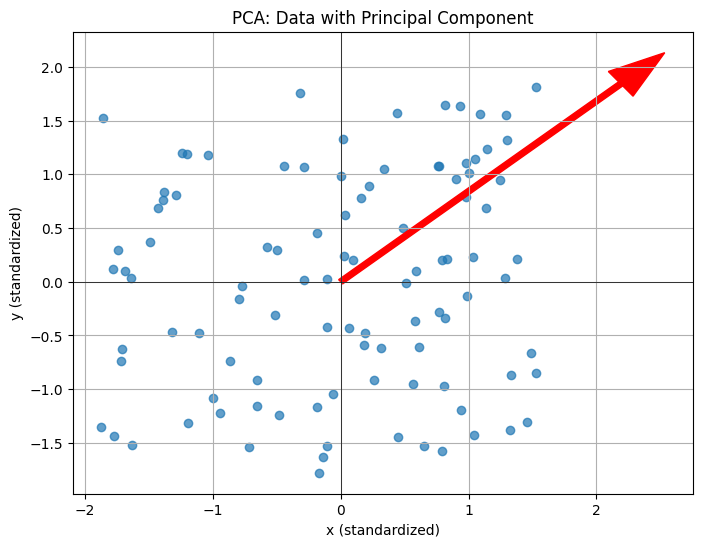

In [12]:
# Step 6: Plot the standardized data with the principal component
plt.figure(figsize=(8,6))
plt.scatter(data_standardized['x'], data_standardized['y'], alpha=0.7)
plt.xlabel('x (standardized)')
plt.ylabel('y (standardized)')
plt.title('PCA: Data with Principal Component')

# Plot the principal component vector (scaled for visibility)
pc_vector = principal_component * 3  # scale factor
plt.arrow(0, 0, pc_vector[0], pc_vector[1], color='red', width=0.05, head_width=0.3, label='Principal Component')

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()